<a href="https://colab.research.google.com/github/RumeysaCeylan/ImageClassification/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers


from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm

import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb



from keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
folders=glob("/content/drive/MyDrive/archive/Dataset/*")
folders

['/content/drive/MyDrive/archive/Dataset/Very_Mild_Demented',
 '/content/drive/MyDrive/archive/Dataset/Mild_Demented',
 '/content/drive/MyDrive/archive/Dataset/Moderate_Demented',
 '/content/drive/MyDrive/archive/Dataset/Non_Demented']

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')



valid_set = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/archive/validation',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 128)
     

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive/Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 4030 images belonging to 4 classes.
Found 1103 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
for layer in vgg.layers:
    layer.trainable = False

In [10]:
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)
 
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

100%|██████████| 5/5 [04:34<00:00, 54.86s/it]


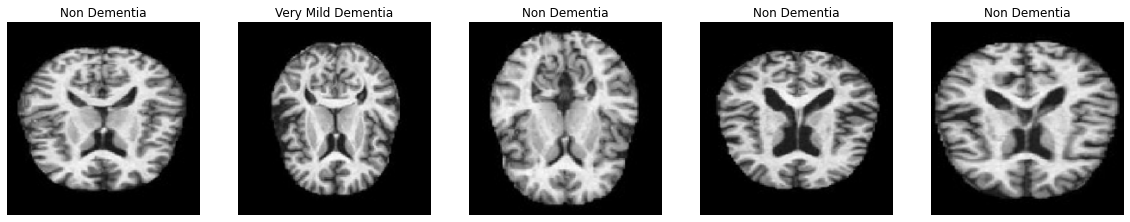

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(training_set))
    rand2 = np.random.randint(100)
    ax[i].imshow(training_set[rand1][0][rand2])
    ax[i].axis('off')
    a = training_set[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = '/content/drive/MyDrive/Colab Notebooks/best_weights_vgg16.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
32/32 [==============================] - 2014s 64s/step - loss: 1.3079 - accuracy: 0.4903 - val_loss: 1.5337 - val_accuracy: 0.4098
Epoch 2/20
32/32 [==============================] - 60s 2s/step - loss: 0.8756 - accuracy: 0.6258 - val_loss: 1.2506 - val_accuracy: 0.4252
Epoch 3/20
32/32 [==============================] - 59s 2s/step - loss: 0.7535 - accuracy: 0.6739 - val_loss: 1.1146 - val_accuracy: 0.4451
Epoch 4/20
32/32 [==============================] - 59s 2s/step - loss: 0.7113 - accuracy: 0.6893 - val_loss: 1.3758 - val_accuracy: 0.4125
Epoch 5/20
32/32 [==============================] - 59s 2s/step - loss: 0.6846 - accuracy: 0.6948 - val_loss: 1.4653 - val_accuracy: 0.4107
Epoch 6/20
32/32 [==============================] - 58s 2s/step - loss: 0.6258 - accuracy: 0.7357 - val_loss: 1.4950 - val_accuracy: 0.4279
Epoch 7/20
32/32 [==============================] - 58s 2s/step - loss: 0.6039 - accuracy: 0.7414 - val_loss: 1.0347 - val_accuracy: 0.5059
Epoch 8/20
32/32 

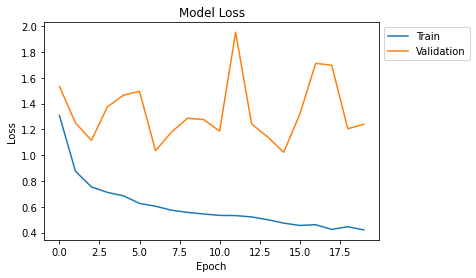

In [17]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()
     

In [18]:
# Summarize history for loss

plt.plot(r.history['auc'])
plt.plot(r.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()


KeyError: ignored

1/1 [==============================] - 1s 847ms/step
97.24 % chances are there that the image is Non_Demented


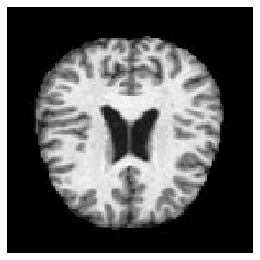

In [19]:

# Test Case 1: Non-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_105.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 31ms/step
74.9 % chances are there that the image is Non_Demented


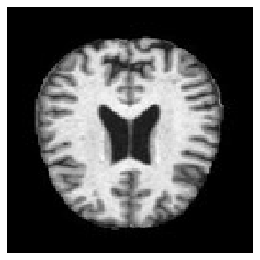

In [20]:

# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Very_Mild_Demented/verymild_112.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 23ms/step
77.02 % chances are there that the image is Non_Demented


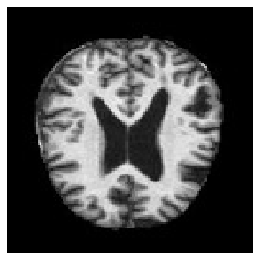

In [21]:

# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_128.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 24ms/step
69.58 % chances are there that the image is Very_Mild_Demented


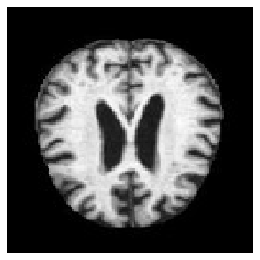

In [22]:

# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Mild_Demented/mild_113.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 73ms/step
90.56 % chances are there that the image is Mild_Demented


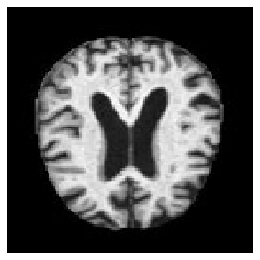

In [23]:

# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Mild_Demented/mild.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

In [24]:

import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/MyDrive/archive/models/vgg16alzheimer.hdf5')
     